<a href="https://colab.research.google.com/github/laurindodumba/Trabalho-em-de-Vis-o-Comptuacional-UFSC/blob/main/segm_yolov8_doenca_folha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Montando o drive gdrive

In [ ]:
#imput pelo googlecolab
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


Unzip

In [ ]:
from zipfile import ZipFile
file_name = '/content/gdrive/MyDrive/Colab Notebooks/INE410121 - VC 2023 - files/leafSeg.v1i.yolov8.zip'
#salvar o dataset no gdrive e mudar caminho quem for o rodar
#file_name = '/content/gdrive/MyDrive/etc...'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


reorganizando as pastas

In [ ]:
import os
import shutil

In [ ]:
ls

data.yaml  gdrive/  README.dataset.txt  README.roboflow.txt  sample_data/  test/  train/  valid/


In [ ]:
!mkdir dataset_doenca

In [ ]:
original = '/content/train'
target = '/content/dataset_doenca'

shutil.move(original, target)

'/content/dataset_doenca/train'

In [ ]:
original = '/content/test'
target = '/content/dataset_doenca'

shutil.move(original, target)

'/content/dataset_doenca/test'

In [ ]:
original = '/content/valid'
target = '/content/dataset_doenca'

shutil.move(original, target)

'/content/dataset_doenca/valid'

In [ ]:
original = '/content/data.yaml'
target = '/content/dataset_doenca'

shutil.move(original, target)

'/content/dataset_doenca/data.yaml'

**pré-processamento**

transformando todas as classes de doenças em apenas uma classe e retirando a classe healthy do dataset

In [ ]:
from genericpath import isfile
dataset_doenca_path = '/content/dataset_doenca/'

for folder_task in os.listdir(dataset_doenca_path):
  #print(folder_task)
  if os.path.isdir(dataset_doenca_path + folder_task):
    caminho_completo_ate_labels = dataset_doenca_path + folder_task + '/' + "labels/"
    for txt_file in os.listdir(caminho_completo_ate_labels):

      caminho_completo_ate_txt = caminho_completo_ate_labels + '/' + txt_file
      #print(txt_file)

      with open(caminho_completo_ate_txt, 'r') as f:
        contents = f.readlines()
      for idx, line in enumerate(contents):
        #healthy
        if line[0] == '1':
          blablabla = contents.pop(idx)
        #early
        elif contents[idx][0] == '2':
          #contents[idx][0] = '0'
          new_content = "0" + contents[idx][1:]
          contents[idx] = new_content
          #print(new_content)
      with open(caminho_completo_ate_txt, 'w') as ff:
        for write_line in contents:
          ff.write(write_line)




**YOLOV8 Segmentação**

In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.9/645.9 kB 10.7 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

fazendo download modelo pre treinado

In [ ]:
#Models download automatically from the latest Ultralytics release on first use.
model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)

100%|██████████| 6.73M/6.73M [00:00<00:00, 79.5MB/s]


testando com uma predição

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2

função para mostrar as imagens

In [ ]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  plt.show()

modificar yaml file manualmente com texto abaixo

In [ ]:
train: /content/dataset_doenca/train/images
val: /content/dataset_doenca/valid/images
test: /content/dataset_doenca/test/images

nc: 1
names: ['desease']

roboflow:
  workspace: siva-uomuz
  project: leafseg
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/siva-uomuz/leafseg/dataset/1

**trainging the model**

In [ ]:
results = model.train(data='/content/dataset_doenca/data.yaml', epochs=100, imgsz=640, project='seg_doenca_folha')

Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/dataset_doenca/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=seg_doenca_folha, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_

100%|██████████| 755k/755k [00:00<00:00, 14.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 74.8MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset_doenca/train/labels... 105 images, 36 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:00<00:00, 1404.70it/s]

train: New cache created: /content/dataset_doenca/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset_doenca/valid/labels... 30 images, 7 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<00:00, 1239.82it/s]

val: New cache created: /content/dataset_doenca/valid/labels.cache


Plotting labels to seg_doenca_folha/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to seg_doenca_folha/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.72G      2.202      4.137      3.611      1.648        120        640: 100%|██████████| 7/7 [00:12<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]

                   all         30        202    0.00867      0.386    0.00778    0.00339    0.00833      0.371    0.00682    0.00266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.76G       2.06      3.426      2.997      1.425        107        640: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all         30        202       0.02      0.891      0.322      0.109     0.0192      0.856      0.345      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.53G       1.98      2.994      1.895      1.308         75        640: 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         30        202     0.0198      0.881      0.296       0.11     0.0188      0.837       0.31      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.74G      1.864      2.899      1.716      1.277         80        640: 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.59s/it]

                   all         30        202     0.0193      0.861      0.187     0.0846     0.0194      0.866      0.215     0.0851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.41G      1.835      2.848      1.626       1.32         50        640: 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         30        202       0.22     0.0891     0.0869     0.0362      0.259      0.099     0.0988     0.0389



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.79G      1.855      2.758      1.568      1.322         85        640: 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         30        202     0.0546     0.0446     0.0315     0.0132     0.0716     0.0446     0.0417     0.0162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.42G      1.877      2.754      1.557      1.304        160        640: 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.51s/it]

                   all         30        202      0.152     0.0446       0.06     0.0261       0.22     0.0495      0.065     0.0274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.44G      1.846      2.718      1.442      1.281        150        640: 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         30        202      0.243     0.0842      0.187      0.067      0.285     0.0941      0.194     0.0735



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.89G      1.801      2.609      1.404      1.279        110        640: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

                   all         30        202      0.265      0.255      0.171      0.066       0.28      0.267      0.192     0.0696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.62G       1.84      2.731       1.46      1.267         66        640: 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         30        202      0.182      0.213      0.144     0.0532      0.182      0.216      0.141     0.0528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.68G      1.827      2.611       1.38       1.28        124        640: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         30        202      0.153      0.267      0.131     0.0512      0.154      0.259      0.133     0.0498



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.48G      1.866      2.651      1.426      1.271        107        640: 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all         30        202      0.197      0.267      0.167     0.0595      0.211      0.282      0.171     0.0659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.66G       1.87      2.711      1.463      1.304         91        640: 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all         30        202      0.319      0.391      0.238     0.0872      0.339      0.416      0.264     0.0927



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.61G      1.802      2.624       1.49      1.302         85        640: 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         30        202      0.403      0.502      0.376      0.128      0.409      0.509      0.366       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.56G      1.829      2.642      1.397       1.32        119        640: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.62s/it]

                   all         30        202      0.549      0.505      0.444      0.143      0.528      0.495      0.399       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.57G      1.772      2.643      1.394      1.273         90        640: 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         30        202      0.425      0.426      0.314      0.116      0.402      0.426      0.307      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.55G      1.727      2.591      1.314      1.261         70        640: 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all         30        202      0.506      0.376      0.389      0.153      0.376      0.455      0.348      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.46G      1.817      2.583      1.384       1.29         64        640: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

                   all         30        202      0.533      0.495      0.457      0.156      0.533      0.495      0.461      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.64G      1.778      2.595      1.305       1.25        181        640: 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all         30        202      0.564      0.551      0.523      0.205      0.593       0.55      0.529      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.47G      1.818      2.645      1.343      1.306         75        640: 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all         30        202      0.465      0.473      0.416      0.161      0.444      0.557      0.424      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.69G       1.85      2.598      1.319      1.308         88        640: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all         30        202      0.463        0.5      0.397      0.147       0.49       0.53      0.426      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.49G      1.803       2.66      1.371      1.317         81        640: 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

                   all         30        202      0.457      0.626      0.451       0.18      0.495      0.594      0.439       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.58G      1.743      2.578      1.423       1.25        112        640: 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all         30        202      0.457      0.619      0.396      0.159      0.447      0.604      0.383       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100       3.6G      1.795      2.648      1.374      1.296        104        640: 100%|██████████| 7/7 [00:04<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         30        202       0.48      0.644       0.43      0.176      0.495      0.639      0.454      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.61G      1.765      2.539      1.326      1.261         74        640: 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

                   all         30        202      0.444      0.594      0.402      0.175      0.454      0.586      0.433      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.39G       1.81      2.573      1.289      1.267        110        640: 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.51s/it]

                   all         30        202      0.336      0.441      0.326      0.141       0.34       0.46      0.343      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.42G      1.736      2.557      1.261      1.223        155        640: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         30        202      0.454      0.604      0.433       0.18      0.457      0.612      0.445      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.41G      1.767      2.552      1.253      1.279        206        640: 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         30        202      0.429      0.431      0.333      0.129      0.465       0.48      0.387      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.61G      1.749      2.585      1.296        1.3         74        640: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all         30        202      0.391      0.426      0.309      0.112      0.388       0.49      0.356      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.47G      1.775      2.622       1.29      1.283         89        640: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         30        202      0.367      0.589      0.365      0.148      0.378      0.599       0.39      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.83G      1.724      2.554      1.466       1.28         14        640: 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         30        202      0.544      0.599       0.51      0.183      0.549      0.599      0.489      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.77G      1.761      2.629      1.227      1.243        107        640: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         30        202      0.677      0.639      0.667      0.259        0.7      0.657       0.68      0.242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.69G      1.652      2.428      1.131      1.205         57        640: 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         30        202      0.667      0.698      0.661      0.277      0.692      0.723      0.683       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.12G      1.745      2.506      1.196      1.274         95        640: 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         30        202      0.583      0.711      0.593      0.243      0.586      0.714      0.609      0.233



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.56G      1.666      2.478      1.151      1.224         86        640: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all         30        202      0.639      0.673      0.645       0.26      0.682      0.711       0.69      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.49G      1.704      2.493      1.164       1.26         95        640: 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all         30        202      0.735      0.663      0.682      0.279      0.769      0.693      0.713      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.41G      1.644       2.37      1.118      1.213        188        640: 100%|██████████| 7/7 [00:02<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all         30        202      0.666      0.673       0.65      0.258      0.701      0.708      0.691      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.67G      1.646      2.446      1.116      1.202        117        640: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

                   all         30        202      0.655      0.663      0.634       0.25      0.693      0.683      0.666       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.46G      1.639      2.429      1.075       1.19        138        640: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         30        202      0.647      0.757       0.69      0.265      0.725      0.678      0.707      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.61G      1.683      2.354      1.088      1.212        145        640: 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         30        202      0.682      0.698      0.671      0.255      0.712      0.728      0.701      0.257



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.39G      1.673      2.386      1.138      1.214        145        640: 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]

                   all         30        202      0.675      0.688      0.669      0.257       0.69      0.703      0.694      0.259



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.54G      1.697      2.495      1.178      1.232        107        640: 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         30        202       0.61      0.642      0.603      0.216      0.633      0.653      0.614      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.49G      1.691       2.47      1.181      1.223        136        640: 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all         30        202      0.727      0.658      0.663      0.267      0.755      0.668      0.678      0.269



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.44G      1.661       2.43      1.116      1.229        107        640: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all         30        202       0.69      0.629      0.648      0.249      0.673      0.663      0.679      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.79G      1.643      2.438      1.142      1.213         73        640: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all         30        202       0.68      0.658       0.68       0.27      0.645      0.713      0.692      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.62G      1.612      2.408      1.107      1.209         46        640: 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all         30        202       0.78      0.634      0.687      0.288      0.675      0.718       0.71      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.51G      1.622      2.398      1.089      1.199         85        640: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         30        202      0.733      0.629      0.679       0.28      0.666      0.678      0.707      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.37G      1.582      2.347      1.049      1.179         88        640: 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         30        202      0.661      0.678      0.663      0.274      0.665      0.628       0.66      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.38G      1.608      2.333      1.111      1.192         39        640: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all         30        202      0.645      0.728      0.676      0.275      0.626      0.757       0.69      0.252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.65G      1.569      2.378      1.061      1.185        121        640: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         30        202      0.703      0.683      0.701      0.271      0.716      0.688      0.725      0.252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100       3.4G      1.572      2.359      1.015      1.195         85        640: 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

                   all         30        202      0.664      0.738      0.675      0.268      0.714      0.683      0.669      0.242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.65G      1.525      2.265     0.9596       1.14        121        640: 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]

                   all         30        202      0.739      0.687      0.692      0.287       0.74      0.688      0.693      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.97G      1.588      2.365     0.9858      1.184        124        640: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         30        202        0.7      0.728      0.711      0.294      0.711      0.694      0.708      0.265



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.39G      1.622      2.325      1.014      1.194        136        640: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         30        202      0.745      0.738      0.724      0.273      0.707      0.723      0.698      0.247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100       3.4G        1.6      2.347      1.035      1.177         76        640: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all         30        202      0.752      0.693      0.716      0.282       0.77      0.703       0.72      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.61G      1.553      2.297      1.034      1.167         75        640: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         30        202       0.75      0.703      0.698      0.275      0.736      0.702      0.698      0.249



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.37G      1.568      2.323     0.9993      1.174         72        640: 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         30        202      0.717      0.715      0.695      0.273      0.721      0.708      0.718      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.54G      1.597      2.258     0.9948      1.155        117        640: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all         30        202      0.728      0.728      0.687      0.271      0.668      0.688      0.652      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.39G      1.614      2.427       1.04      1.211         99        640: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all         30        202      0.761      0.724        0.7      0.273      0.745      0.713      0.705      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.53G      1.529      2.268     0.9671       1.14         85        640: 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         30        202      0.706      0.713      0.682      0.265      0.694      0.685       0.69      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.55G      1.489      2.216     0.9566      1.127        146        640: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all         30        202      0.661      0.743      0.676      0.264       0.68      0.703      0.684      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.54G      1.551      2.323     0.9926      1.158        106        640: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         30        202      0.612      0.663      0.599      0.233      0.646      0.673      0.615      0.225



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.62G      1.565      2.285     0.9868      1.158        173        640: 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         30        202      0.671      0.668      0.631      0.238       0.69      0.683      0.657      0.233



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.42G      1.522      2.268     0.9721      1.154        102        640: 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

                   all         30        202      0.699      0.698      0.667      0.261      0.681      0.698      0.677      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100       3.8G      1.558      2.287     0.9785      1.131        173        640: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all         30        202      0.712      0.678      0.683      0.268      0.725      0.678      0.702      0.259



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100       3.4G      1.479      2.291     0.9596      1.129        176        640: 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         30        202      0.729      0.673      0.697      0.262      0.724      0.668      0.699      0.261



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.46G      1.486      2.235     0.9186      1.128        109        640: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all         30        202      0.663      0.713      0.679      0.255      0.677      0.728       0.68      0.239



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.59G      1.506      2.208     0.9315      1.114         76        640: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         30        202      0.681      0.708      0.685      0.268       0.69      0.718      0.689       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.45G      1.447      2.221     0.8935      1.125         94        640: 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all         30        202      0.698      0.713      0.695      0.276      0.707      0.723      0.698       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.57G      1.509      2.257     0.9566      1.163         84        640: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all         30        202      0.658      0.708      0.661      0.268      0.687      0.733      0.705      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.63G      1.466      2.129     0.9004      1.111        121        640: 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         30        202      0.662      0.668      0.626      0.241      0.676      0.609      0.642      0.236



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.42G      1.467      2.205     0.9047      1.151         71        640: 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         30        202      0.638      0.629      0.574      0.232      0.625      0.619      0.605      0.226



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.47G      1.466      2.231     0.9195       1.13        138        640: 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all         30        202      0.646      0.651      0.608      0.244      0.667      0.643      0.648      0.239



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.35G      1.472       2.24     0.9147      1.124        139        640: 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         30        202      0.664      0.715      0.659       0.27      0.708      0.698      0.697      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.26G      1.442      2.191     0.9197      1.137         60        640: 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         30        202       0.71      0.743       0.69       0.28      0.724      0.757      0.729      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100       3.5G       1.48      2.186     0.8926      1.129         71        640: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all         30        202      0.714      0.708       0.69      0.266      0.702      0.757      0.712      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.16G      1.484      2.208     0.8824      1.118         97        640: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         30        202      0.719      0.718      0.684      0.262      0.697      0.738        0.7      0.245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.57G      1.426      2.156     0.8667      1.101        136        640: 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         30        202      0.773      0.741      0.705       0.27      0.766      0.743       0.72      0.262



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.79G      1.453      2.216     0.8858      1.104         92        640: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all         30        202      0.766      0.743      0.706      0.274      0.773      0.748      0.721      0.265



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.69G      1.478      2.207     0.8761       1.12        112        640: 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         30        202      0.746      0.757      0.706      0.271      0.736      0.745      0.702      0.261



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.65G      1.441      2.135     0.8818      1.093         75        640: 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all         30        202       0.72      0.752      0.702      0.273       0.75      0.742      0.711      0.262



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.55G      1.428      2.132      0.843      1.117        106        640: 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

                   all         30        202      0.731      0.739      0.695      0.268       0.73      0.733      0.702      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.63G      1.427      2.199     0.8754      1.097        104        640: 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         30        202      0.714      0.723       0.69      0.265      0.717      0.718      0.714      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100       3.5G      1.463       2.22     0.8609      1.117         64        640: 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

                   all         30        202      0.707      0.698      0.676      0.263      0.785      0.663      0.712      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.64G      1.389      2.095      0.829      1.096         98        640: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

                   all         30        202      0.706      0.713      0.671      0.256      0.736      0.689      0.701      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.55G      1.422      2.156      0.845      1.075        133        640: 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         30        202       0.73      0.708      0.676      0.254      0.721      0.698      0.682      0.239



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.54G      1.369      2.081     0.8096      1.073        102        640: 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all         30        202      0.745      0.722      0.683      0.262      0.729      0.707      0.668      0.245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100       3.5G      1.406      2.123     0.8483      1.087         79        640: 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         30        202      0.722      0.738      0.689      0.269      0.732      0.698      0.673      0.247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.71G      1.317      2.081     0.7781      1.058        104        640: 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         30        202      0.727      0.757      0.698      0.273      0.749      0.695       0.68      0.249



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.41G      1.328      2.025     0.8025      1.082        111        640: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all         30        202      0.739      0.727      0.691      0.275      0.728      0.715      0.681      0.251


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100       3.7G      1.363      2.168     0.8754      1.091         54        640: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

                   all         30        202      0.739      0.738      0.683      0.277      0.712      0.708      0.673      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.41G       1.37      2.132      0.862      1.102         64        640: 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         30        202      0.698      0.696      0.667      0.268      0.696      0.701      0.663      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100       3.5G      1.358      2.173     0.8476      1.112         94        640: 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all         30        202      0.678      0.688      0.651      0.263      0.687      0.698      0.664      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.51G      1.366      2.122     0.8932      1.105         10        640: 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         30        202      0.651      0.698      0.647      0.261      0.658      0.698      0.648      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.56G        1.3      2.094     0.8207      1.101         54        640: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         30        202      0.701      0.709      0.667      0.265      0.692      0.702      0.675      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.59G      1.326      2.085     0.8391      1.111          9        640: 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         30        202      0.705      0.733      0.673      0.267      0.723      0.724      0.696      0.261
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 46, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



96 epochs completed in 0.170 hours.
Optimizer stripped from seg_doenca_folha/train/weights/last.pt, 6.8MB
Optimizer stripped from seg_doenca_folha/train/weights/best.pt, 6.8MB

Validating seg_doenca_folha/train/weights/best.pt...
Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


                   all         30        202      0.774      0.634       0.69      0.288      0.676      0.718       0.71      0.283
Speed: 0.2ms preprocess, 3.0ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to seg_doenca_folha/train


In [ ]:
model_ = YOLO('/content/seg_doenca_folha/train/weights/best.pt')  # load a pretrained model (recommended for training)

Validando o modelo

In [ ]:
# Validate the model
metrics = model_.val()  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /content/dataset_doenca/valid/labels.cache... 30 images, 7 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]


                   all         30        202      0.769      0.634      0.693      0.287      0.677      0.728      0.706      0.279
Speed: 0.3ms preprocess, 25.0ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/segment/val


In [ ]:
print('map50-95: ', metrics.box.map)

map50-95:  0.2866556737525194


In [ ]:
print('map50: ', metrics.box.map50)

map50:  0.693280003617062


In [ ]:
print('map75: ', metrics.box.map75)

map75:  0.18302580018887996


In [ ]:
results_test_single = model_('/content/dataset_doenca/test/images/Early_blight10_JPG.rf.00ab824e7d7b102e4700e8a9f0df6d14.jpg')  # predict on an image


image 1/1 /content/dataset_doenca/test/images/Early_blight10_JPG.rf.00ab824e7d7b102e4700e8a9f0df6d14.jpg: 640x640 20 deseases, 10.2ms
Speed: 4.2ms preprocess, 10.2ms inference, 13.0ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
annotated_single = results_test_single[0].plot()

In [ ]:
from google.colab.patches import cv2_imshow

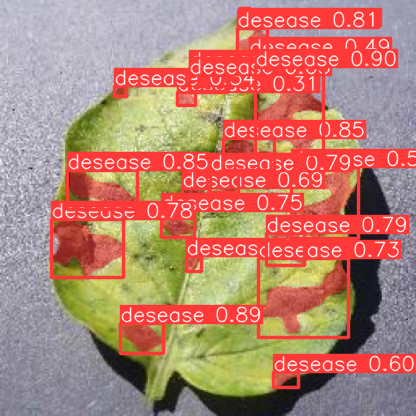

In [ ]:
cv2_imshow(annotated_single)

Healthy37_JPG.rf.7414c42e09dbc9878a66f3b35d4243af.jpg

image 1/1 /content/dataset_doenca/test/images/Healthy37_JPG.rf.7414c42e09dbc9878a66f3b35d4243af.jpg: 640x640 1 desease, 11.6ms
Speed: 4.6ms preprocess, 11.6ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)


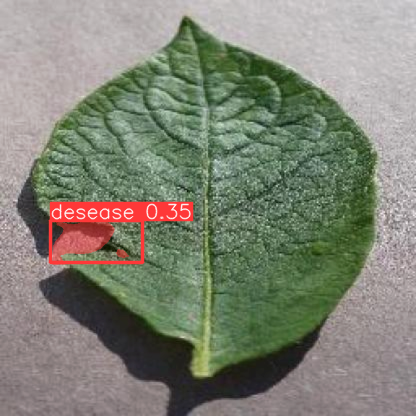

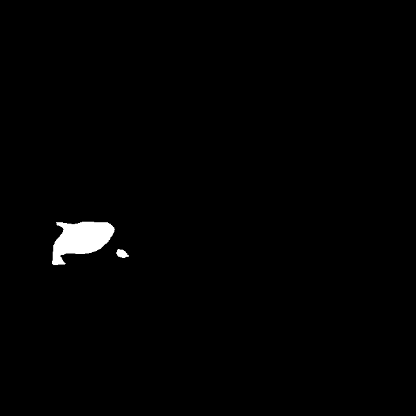

Late_Blight37_JPG.rf.33244c1fcf25e9d7503fc83be725a9bd.jpg

image 1/1 /content/dataset_doenca/test/images/Late_Blight37_JPG.rf.33244c1fcf25e9d7503fc83be725a9bd.jpg: 640x640 5 deseases, 12.7ms
Speed: 4.3ms preprocess, 12.7ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)


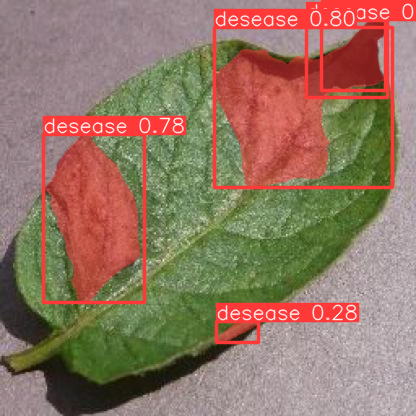

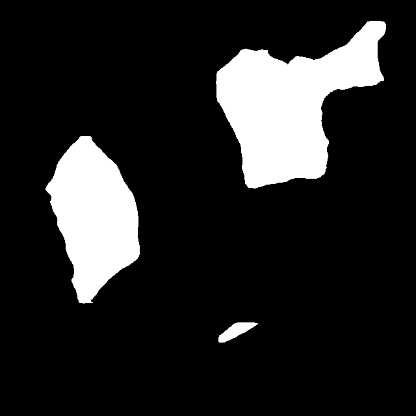

Early_blight44_JPG.rf.63a0037c1f5461ce149bca2b081bb9de.jpg

image 1/1 /content/dataset_doenca/test/images/Early_blight44_JPG.rf.63a0037c1f5461ce149bca2b081bb9de.jpg: 640x640 20 deseases, 13.3ms
Speed: 3.1ms preprocess, 13.3ms inference, 10.6ms postprocess per image at shape (1, 3, 640, 640)


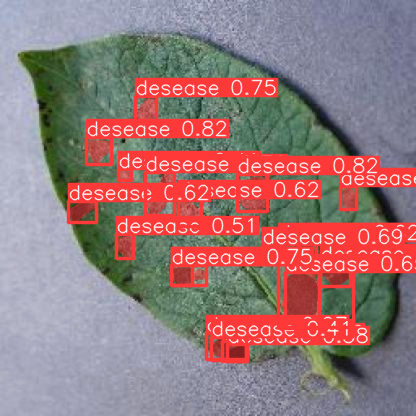

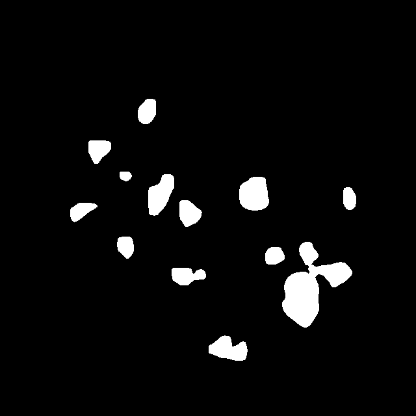

Late_Blight34_JPG.rf.f1e52a4ace28e279aa04edf51497eb79.jpg

image 1/1 /content/dataset_doenca/test/images/Late_Blight34_JPG.rf.f1e52a4ace28e279aa04edf51497eb79.jpg: 640x640 5 deseases, 13.8ms
Speed: 3.1ms preprocess, 13.8ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)


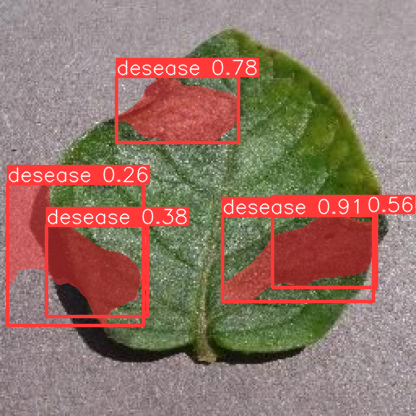

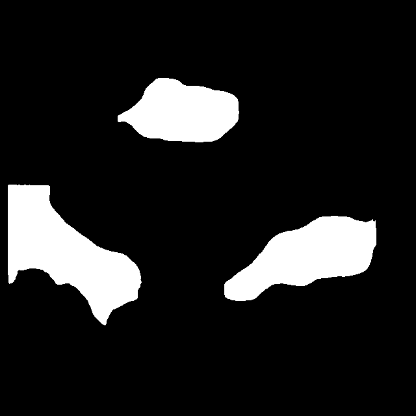

Healthy7_JPG.rf.77601bae76bd564ec86fcd3d1adb70cf.jpg

image 1/1 /content/dataset_doenca/test/images/Healthy7_JPG.rf.77601bae76bd564ec86fcd3d1adb70cf.jpg: 640x640 (no detections), 11.9ms
Speed: 3.3ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


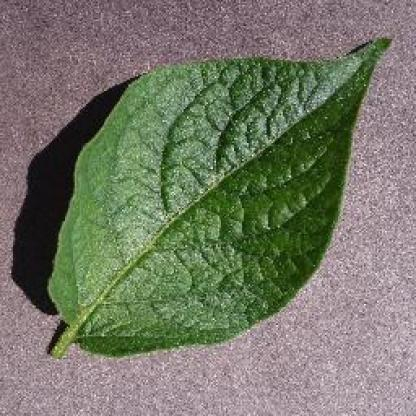

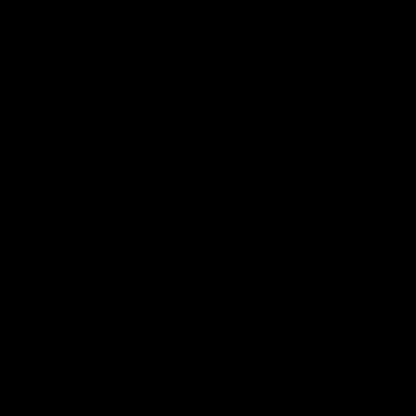

Healthy49_JPG.rf.d915dc57c8c3a08c2cbeb2f0a4111987.jpg

image 1/1 /content/dataset_doenca/test/images/Healthy49_JPG.rf.d915dc57c8c3a08c2cbeb2f0a4111987.jpg: 640x640 (no detections), 14.6ms
Speed: 3.6ms preprocess, 14.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


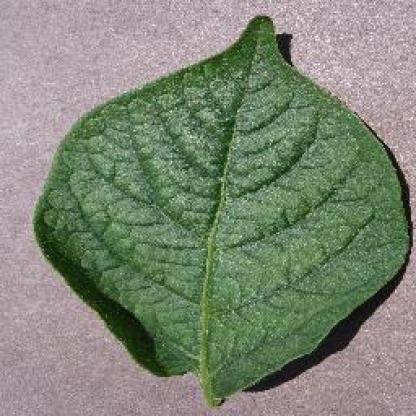

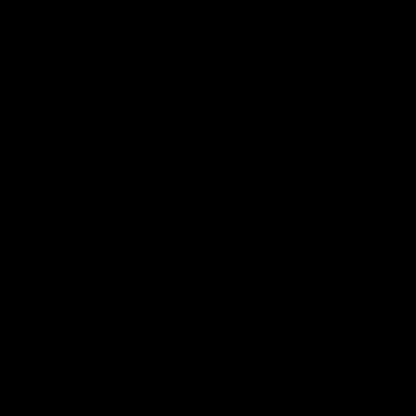

Early_blight22_JPG.rf.99d21982939f03b3883d48b12ec53f68.jpg

image 1/1 /content/dataset_doenca/test/images/Early_blight22_JPG.rf.99d21982939f03b3883d48b12ec53f68.jpg: 640x640 25 deseases, 14.4ms
Speed: 3.4ms preprocess, 14.4ms inference, 12.2ms postprocess per image at shape (1, 3, 640, 640)


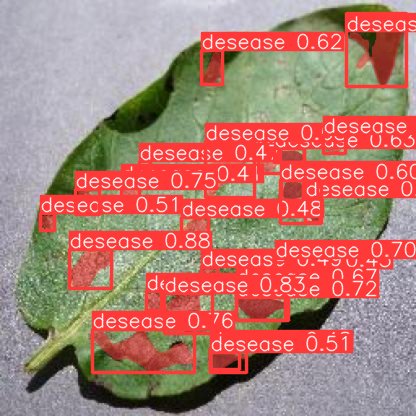

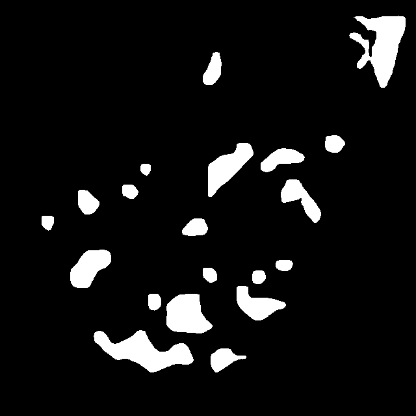

Healthy22_JPG.rf.79078c62d4e2c144c460a62208fbdf00.jpg

image 1/1 /content/dataset_doenca/test/images/Healthy22_JPG.rf.79078c62d4e2c144c460a62208fbdf00.jpg: 640x640 (no detections), 16.5ms
Speed: 3.4ms preprocess, 16.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


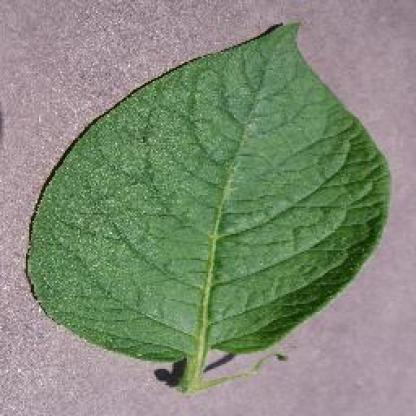

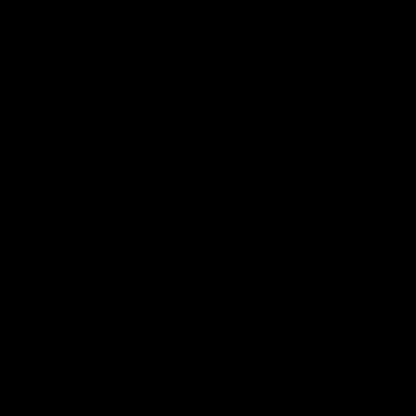

Healthy30_JPG.rf.596f02581875f6e59a667297e28843a6.jpg

image 1/1 /content/dataset_doenca/test/images/Healthy30_JPG.rf.596f02581875f6e59a667297e28843a6.jpg: 640x640 (no detections), 15.9ms
Speed: 3.0ms preprocess, 15.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


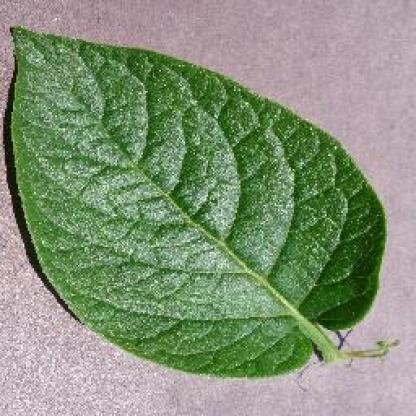

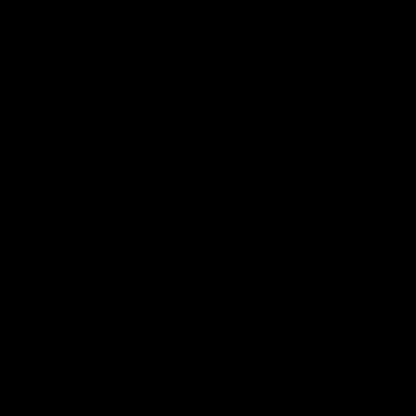

Healthy38_JPG.rf.4c4e0500b9ca382dcedc15340b690fc8.jpg

image 1/1 /content/dataset_doenca/test/images/Healthy38_JPG.rf.4c4e0500b9ca382dcedc15340b690fc8.jpg: 640x640 (no detections), 13.1ms
Speed: 3.4ms preprocess, 13.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


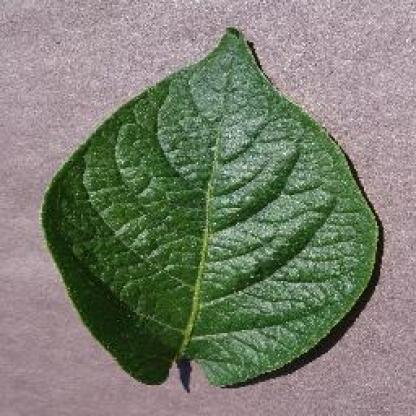

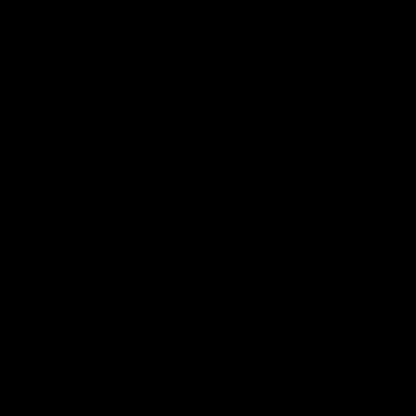

Healthy50_JPG.rf.4e78b9bef7699cf1ecc5a09bc35a77d5.jpg

image 1/1 /content/dataset_doenca/test/images/Healthy50_JPG.rf.4e78b9bef7699cf1ecc5a09bc35a77d5.jpg: 640x640 (no detections), 13.7ms
Speed: 3.2ms preprocess, 13.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


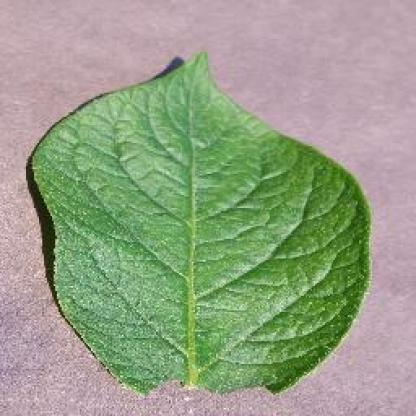

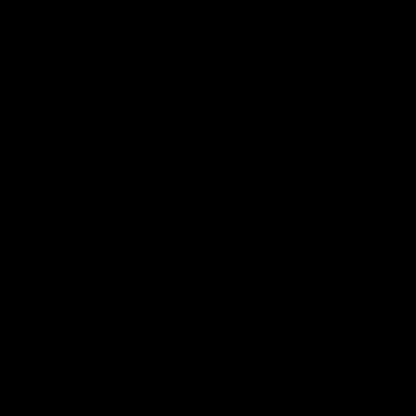

Late_Blight43_JPG.rf.088cf72e4ed9a4f10c14a5a0ee5cbcdb.jpg

image 1/1 /content/dataset_doenca/test/images/Late_Blight43_JPG.rf.088cf72e4ed9a4f10c14a5a0ee5cbcdb.jpg: 640x640 3 deseases, 14.2ms
Speed: 3.5ms preprocess, 14.2ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)


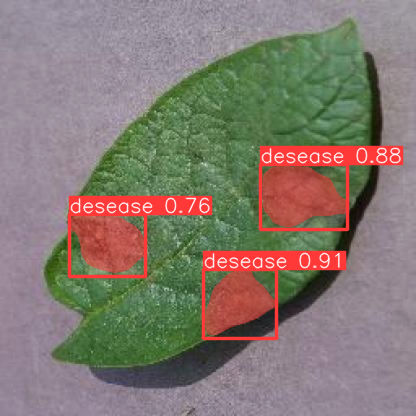

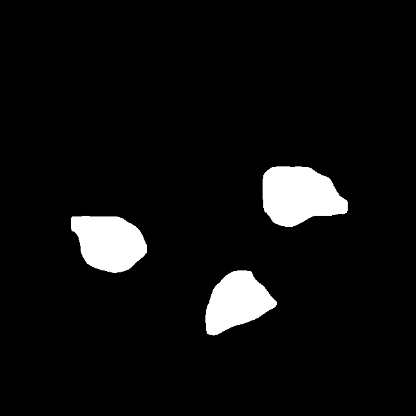

Late_Blight35_JPG.rf.0a0214e851f23675935edfa53a9326a3.jpg

image 1/1 /content/dataset_doenca/test/images/Late_Blight35_JPG.rf.0a0214e851f23675935edfa53a9326a3.jpg: 640x640 1 desease, 13.9ms
Speed: 3.2ms preprocess, 13.9ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)


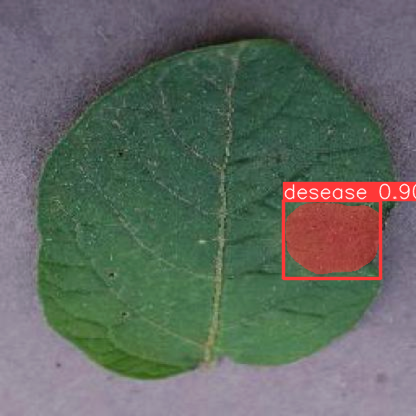

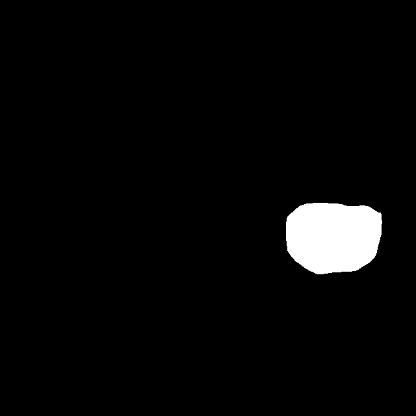

Early_blight10_JPG.rf.00ab824e7d7b102e4700e8a9f0df6d14.jpg

image 1/1 /content/dataset_doenca/test/images/Early_blight10_JPG.rf.00ab824e7d7b102e4700e8a9f0df6d14.jpg: 640x640 20 deseases, 14.6ms
Speed: 3.3ms preprocess, 14.6ms inference, 12.2ms postprocess per image at shape (1, 3, 640, 640)


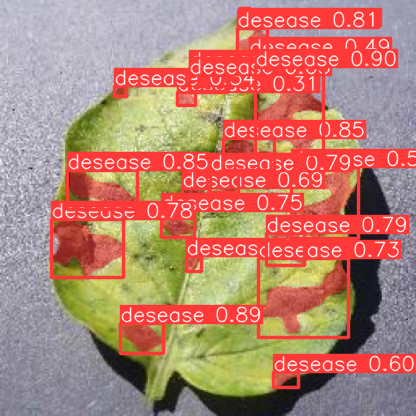

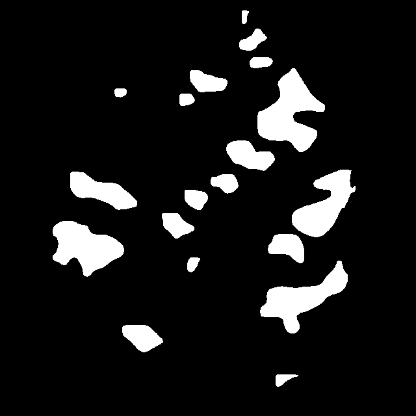

Late_Blight15_JPG.rf.4f046d22b89597d4acd21daea98f9305.jpg

image 1/1 /content/dataset_doenca/test/images/Late_Blight15_JPG.rf.4f046d22b89597d4acd21daea98f9305.jpg: 640x640 1 desease, 20.2ms
Speed: 3.2ms preprocess, 20.2ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)


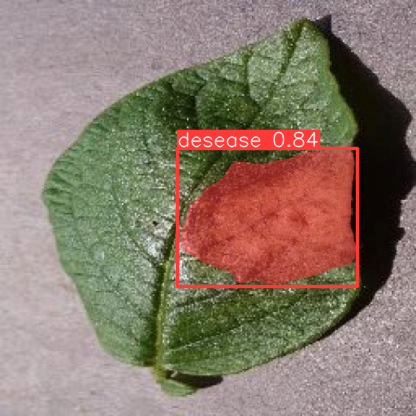

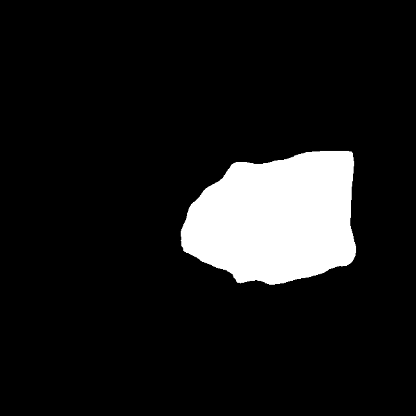

In [ ]:
from pickle import TRUE
import torch
import numpy as np
import cv2

# Predict with the model
img_test_path = '/content/dataset_doenca/test/images/'
for image in os.listdir(img_test_path):
  print(image)
  results_test = model_(img_test_path + image)  # predict on an image
  annotated_image = results_test[0].plot()
  cv2_imshow(annotated_image)


  # get array results
  try:
    masks = results_test[0].masks.data
    boxes = results_test[0].boxes.data
    # extract classes
    clss = boxes[:, 5]
    # get indices of results where class is 0
    _indices = torch.where(clss == 0)
    # use these indices to extract the relevant masks
    _masks = masks[_indices]
    # scale for visualizing results
    _mask = torch.any(_masks, dim=0).int() * 255
    # save to file
    img_mask = _mask.cpu().numpy()
    img = img_mask.astype(np.uint8)
    resized_mask = cv2.resize(img, (416,416))
    cv2_imshow(resized_mask)

  except:
    cv2_imshow(np.zeros((416,416)))

In [ ]:
shutil.copytree('/content/seg_doenca_folha', '/content/gdrive/MyDrive/Colab Notebooks/INE410121 - VC 2023 - files/seg_doenca_folha')

'/content/gdrive/MyDrive/Colab Notebooks/INE410121 - VC 2023 - files/seg_doenca_folha'